In [21]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pd.options.display.max_columns = None

# Analisis descritivo de features

 ### Lectura del dataset obtenido luego del preprocesamiento:

In [22]:
data = pd.read_csv('data_final_sin_dummies.csv', sep=',')

### Eliminacion columnas que no son features:

In [23]:
data.drop(columns=(['Unnamed: 0', 'NUMERO CLIENTE',
       'Cuatrimestre','Tipo cbio. Prom.Mes','Precio Unitario','Cantidad']), inplace=True)

In [24]:
data.describe()

,N° Factura,SKU,Kilos,USD TC Prom.Mes,Condición de pago,Devoluciones,Kilos_Promedio,Kilos_Maximo,Kilos_Minimo,Frecuencia,USD/Ton,Indice devoluciones,Target
count,20869.000000,20869.00000,2.086900e+04,2.086900e+04,20869.000000,20869.000000,2.086900e+04,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000,20869.000000
mean,32.521395,7.87757,8.512416e+04,1.020565e+05,31.375725,0.709521,2.403746e+03,5114.824237,53.384545,2.621256,1447.533863,0.017378,0.078346
std,124.282887,21.90127,2.498566e+05,2.863709e+05,21.037785,3.145908,1.927885e+03,6575.653067,2729.177959,1.217847,513.980395,0.057064,0.268722
min,1.000000,1.00000,4.547474e-13,-9.766570e+06,0.000000,0.000000,1.136868e-13,101.258800,-31286.934500,1.000000,15.347547,0.000000,0.000000
25%,2.000000,2.00000,4.085521e+03,5.768773e+03,30.000000,0.000000,9.910165e+02,1799.608020,-16.826752,1.000000,1148.041218,0.000000,0.000000
50%,7.000000,3.00000,1.513903e+04,2.082073e+04,30.000000,0.000000,1.838375e+03,4026.879360,270.056167,3.000000,1322.224435,0.000000,0.000000
75%,23.000000,7.00000,5.868548e+04,7.567445e+04,45.000000,0.000000,3.270274e+03,7472.484800,936.704400,4.000000,1572.492423,0.000000,0.000000
max,3464.000000,653.00000,5.722055e+06,5.996379e+06,120.000000,89.000000,1.769118e+04,242142.799800,17418.240000,4.000000,4993.555942,0.888889,1.000000


 Se filtran los datos de extremos de las features Kilos y USD TC Prom.mes

In [25]:
mascara= (data['Kilos']>100) & (data['USD TC Prom.Mes']>100)

In [26]:
data1=data[mascara]

## HEATMAP: Grafico de correlaciones entre Features y Target

[Text(0, 0.5, 'N° Factura'),
 Text(0, 1.5, 'SKU'),
 Text(0, 2.5, 'Kilos'),
 Text(0, 3.5, 'USD TC Prom.Mes'),
 Text(0, 4.5, 'Condición de pago'),
 Text(0, 5.5, 'Devoluciones'),
 Text(0, 6.5, 'Kilos_Promedio'),
 Text(0, 7.5, 'Kilos_Maximo'),
 Text(0, 8.5, 'Kilos_Minimo'),
 Text(0, 9.5, 'Frecuencia'),
 Text(0, 10.5, 'USD/Ton'),
 Text(0, 11.5, 'Indice devoluciones'),
 Text(0, 12.5, 'Target')]

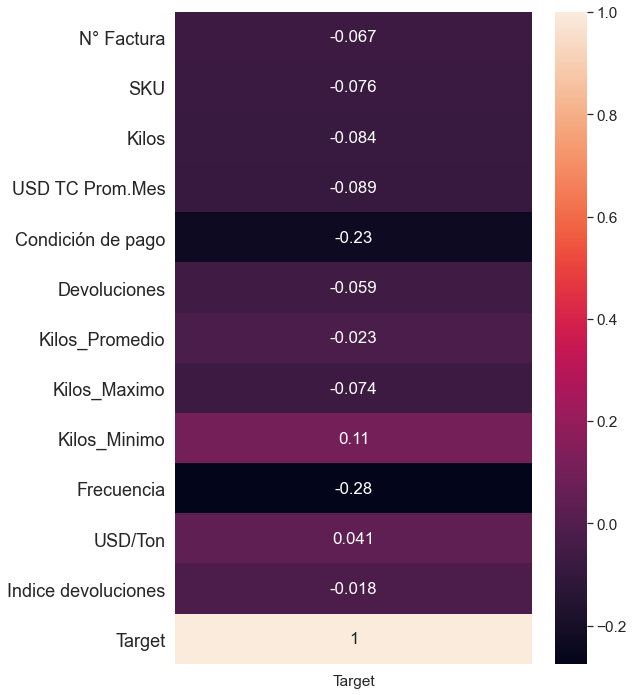

In [27]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8,12))
hm=sns.heatmap(data1.corr()[['Target']], annot=True)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 18)

### Las variables Frecuencia y Condicion de pago son las que presentan mayor correlacion con la Target

## Histogramas de variables numericas discriminadas por Target:

In [28]:
sns.set_style("white")


In [29]:
palette = ['tab:cyan', 'orange']
hue_order=[1,0]

Text(0.5, 1.0, 'USD/Ton')

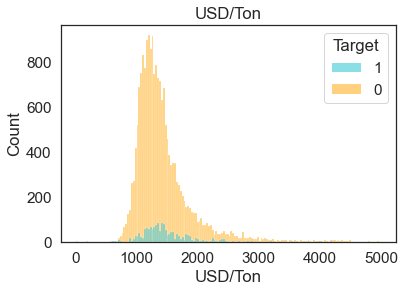

In [30]:
sns.histplot(data=data1, x='USD/Ton',hue='Target', hue_order=hue_order,palette=palette)
plt.title('USD/Ton')

Text(0.5, 1.0, 'Cantidad de tipos de productos')

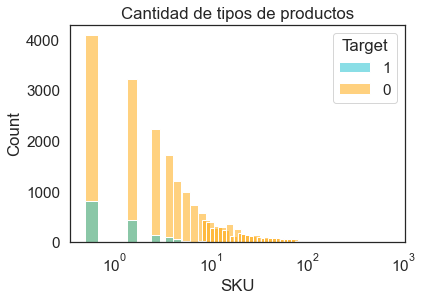

In [31]:
sns.histplot(data=data1, x='SKU',hue='Target', hue_order=hue_order,palette=palette,log_scale=True,shrink=2)
plt.title('Cantidad de tipos de productos')

Text(0.5, 1.0, 'Condicion de pago')

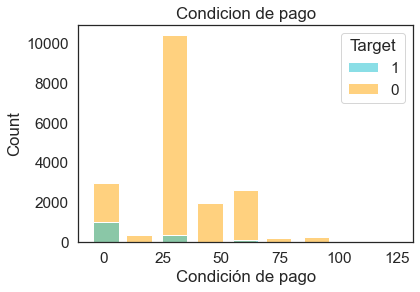

In [32]:
sns.histplot(data=data1, x='Condición de pago',hue='Target', hue_order=hue_order,palette=palette, shrink=10)
plt.title('Condicion de pago')

Text(0.5, 1.0, 'Frecuecia')

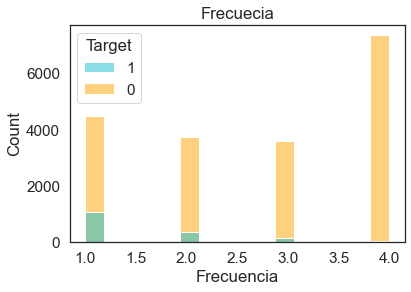

In [33]:
sns.histplot(data=data1, x='Frecuencia',hue='Target', hue_order=hue_order,palette=palette)
plt.title('Frecuecia')

Text(0.5, 1.0, 'Kilos')

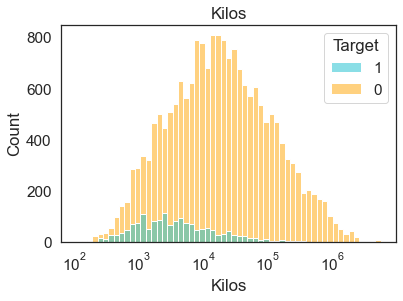

In [14]:
sns.histplot(data=data1, x='Kilos',hue='Target', hue_order=hue_order,palette=palette,log_scale=True)
plt.title('Kilos')

Text(0.5, 1.0, 'Devoluciones')

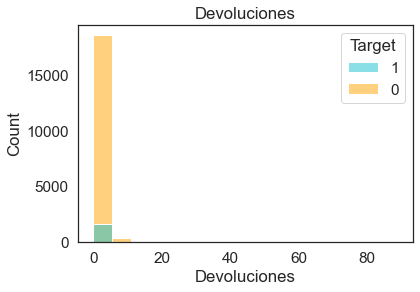

In [34]:
sns.histplot(data=data1, x='Devoluciones',hue='Target', hue_order=hue_order,palette=palette)
plt.title('Devoluciones')

Text(0.5, 1.0, 'Indice devoluciones')

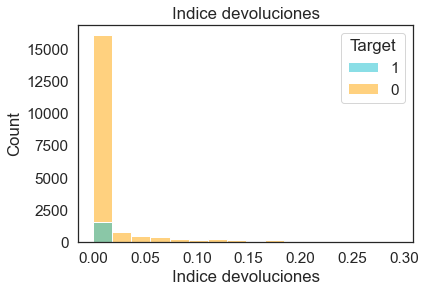

In [16]:
sns.histplot(data=data1[data1['Indice devoluciones']<0.3], x='Indice devoluciones',hue='Target', hue_order=hue_order,palette=palette)
plt.title('Indice devoluciones')

Text(0.5, 1.0, 'USD TC Prom.Mes')

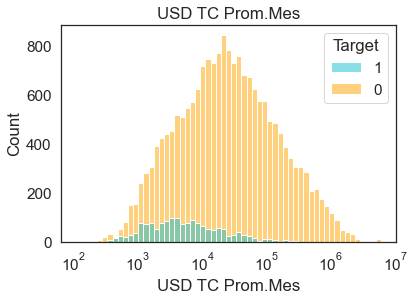

In [35]:
sns.histplot(data=data1, x='USD TC Prom.Mes',hue='Target',log_scale=True, hue_order=hue_order,palette=palette)
plt.title('USD TC Prom.Mes')

## Histogramas de variables categoricas discriminados por Target

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

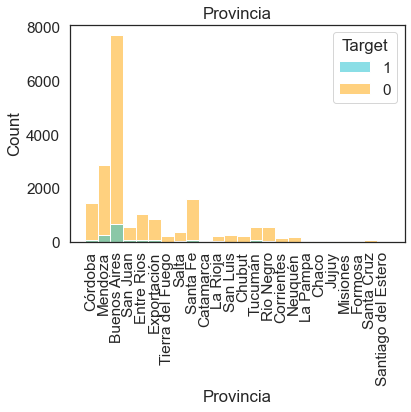

In [36]:
plt.title('Provincia')
prov=sns.histplot(data=data[data['Provincia']!='0.0'], x='Provincia', hue='Target', hue_order=hue_order,palette=palette)
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

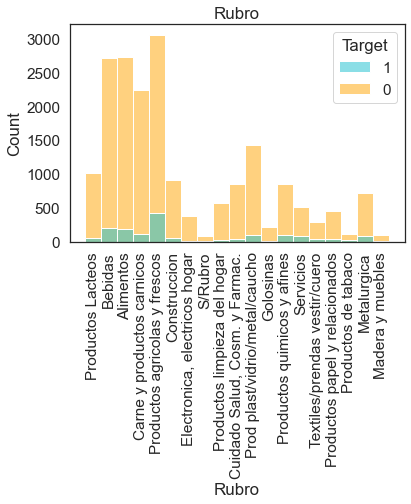

In [37]:
plt.title('Rubro')
sns.histplot(data=data1, x="Rubro", hue="Target",palette=palette, hue_order=hue_order)
plt.xticks(rotation='vertical')